# Shallow Machine Learning Introduction

#### Statistics is the work horse in machine learning.

## Shallow learning
- scikit-learn (a.k.a. sklearn)

## Catagories

| Regression | Classification | Clustering | Dimension Reduction|
| :-: | :-: | :-: | :-: |
| **Linear** | Logistic Regression | K-means | Principle Component Analysis |
| Polynomial | Support Vector Machine | Mean-Shift | Linear Discriminant Analysis |
| StepWise | Naive Bayes | DBScan | Gernalized Discriminant Analysis |
| Ridge | Nearest Neighbor | Agglomerative Hierachcial | Autoencoder |
| Lasso | Decision Tree | Spectral Clustering | Non-Negative Matrix Factorization |
| ElasticNet | Random Forest | Gaussian Mixture | UMAP |

<p><img alt="Classification" width="600" src="00_images/31_machine_learning/shallow_learning_depictions.jpg" align="center" hspace="10px" vspace="0px"></p>

Image Source: de Oliveira, E.C.L., da Costa, K.S., Taube, P.S., Lima, A.H. and Junior, C.D.S.D.S., 2022. Biological Membrane-Penetrating Peptides: Computational Prediction and Applications. Frontiers in Cellular and Infection Microbiology, 12, p.838259. (https://doi.org/10.3389/fcimb.2022.838259)

<hr style="border:2px solid gray"></hr>

## Linear Regression Refresher

**Idea**: Optimize the orientation of a line (i.e. the slope and y-intercept) that best fits coupled parameters (e.g. vaccination effectiveness as a function of dosage).

The equation that defines a line that has a single "feature" (i.e., one independent variable) is 

$y = m*x + b$

where m is the slope and b is the y-intercept.


- A simple, but prevelent technique in machine learning

- Used in often in supervised learning


Additional Info: https://en.wikipedia.org/wiki/Linear_regression

## Learning by example

**Example data**: housing prices across the United States

source: https://github.com/whoparthgarg/House-Price-Prediction (and https://www.kaggle.com/vedavyasv/usa-housing)

- **Avg. Area Income**: Avgerage income of city's residents where the house is located in
- **Avg. Area House Age**: Avgerage age of houses within the same city
- **Avg. Area Number of Rooms**: Avgerage number of rooms for houses within the same city
- **Avg. Area Number of Bedrooms**: Avgerage number of bedrooms for houses within the same city
- **Area Population**: Population of city where the house is located in
- **Price**: Price of the house
- **Address**: Address for the house

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

The dataset (**usa_housing.csv**) can be downloaded from the git repository: https://github.com/karlkirschner/Scientific_Programming_Course

In [2]:
## for Google Colaboratory
# from google.colab import files
# uploaded = files.upload()

In [3]:
!head -2 usa_housing.csv

Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674


Rename the headers since the are very long

In [4]:
headers = ['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address']

housing = pd.read_csv('usa_housing.csv', header=1, names=headers)
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
housing.describe()

,income,age,rooms,bedrooms,population,price
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03
mean,68580.916075,5.977281,6.987788,3.981308,36166.131905,1.232107e+06
std,10657.929222,0.991547,1.005934,1.234260,9924.919201,3.531445e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61479.919569,5.322279,6.299156,3.140000,29406.506987,9.975356e+05
50%,68803.552077,5.970953,7.002864,4.050000,36200.372388,1.232872e+06
75%,75781.478131,6.650870,7.666100,4.490000,42865.210579,1.471389e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
feature_list = ['income', 'age', 'rooms', 'bedrooms', 'population']

#### Visualize the data
Let's plot the features versus price to see what it might look like:

In [7]:
# def plot_features(feature_list, df: pd.DataFrame, plt_predict: bool=False):
#     fig = plt.figure(figsize=(11, 8))

#     fig.subplots_adjust(wspace=0.2, hspace=0.5)

#     for count, feature in enumerate(feature_list):
#         ax = fig.add_subplot(3, 2, count+1)  # first position can not be zero

#         ax.set_xlabel(xlabel=feature)
#         ax.set_ylabel(ylabel='price')

#         ax.scatter(df[feature], df['price'], color='dodgerblue', s=10, alpha=0.3)
#         if plt_predict:
#             plt.plot(df[feature], predict, color='black', linewidth=10, linestyle='solid')

#     plt.show()

In [8]:
# plot_features(feature_list=feature_list, df=housing)

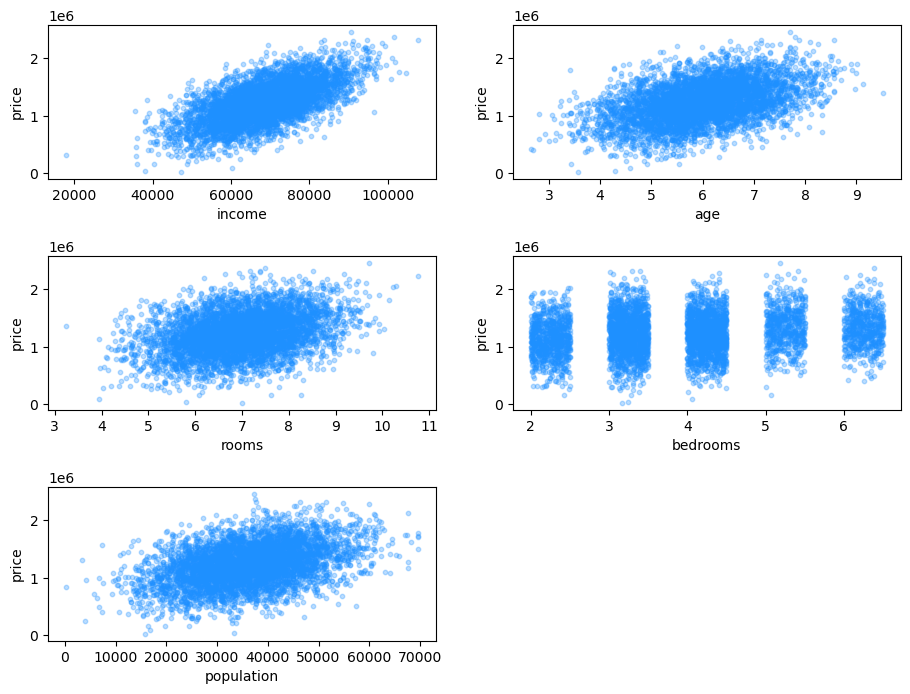

In [9]:
fig = plt.figure(figsize=(11, 8))

fig.subplots_adjust(wspace=0.2, hspace=0.5)

for count, feature in enumerate(feature_list):
    ax = fig.add_subplot(3, 2, count+1)  # first position can not be zero
    
    ax.set_xlabel(xlabel=feature)
    ax.set_ylabel(ylabel='price')
    
    ax.scatter(housing[feature], housing['price'], color='dodgerblue', s=10, alpha=0.3)

plt.show()

<hr style="border:1px solid gray"></hr>

## Linear Regression on a Single Feature (i.e., one dimensional)

The simplest scenario is to focus upon 1 feature (e.g., rooms) and see if we can create a model that allows us to predict a house price based on the number of rooms.

In [10]:
target = housing['price'].values
features = housing['rooms'].values

### Training and Testing

- Good data scholarship means we need to split our data into a training and test sets. We do this by using the following scikit-learn funtion:

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

- Returns: a list containing train-test split of the data input.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

Let's double check the algorithm - we should have 25% of the data being researved for the future testing.

In [12]:
print(f'Length of the training data: {len(target_train)}')
print(f'Length of the test data: {len(target_test)}')

print(f'Fraction of data used for the test data set: '
      f'{len(target_test) / (len(target_train) + len(target_test)) :0.2f}')

Length of the training data: 3749
Length of the test data: 1250
Fraction of data used for the test data set: 0.25


#### Understanding what the output is
- Let's look at the data, and see what shape the NumPy arrays are:

In [13]:
display(features_train)
display(features_train.shape)

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362])

(3749,)

In [14]:
display(target_train)
display(target_train.shape)

array([1334537.42355949, 1310764.11188294,  736798.533309  , ...,
       1265180.90891648,  997618.67976942,  809089.6719455 ])

(3749,)

#### Visualize the trainign and test data


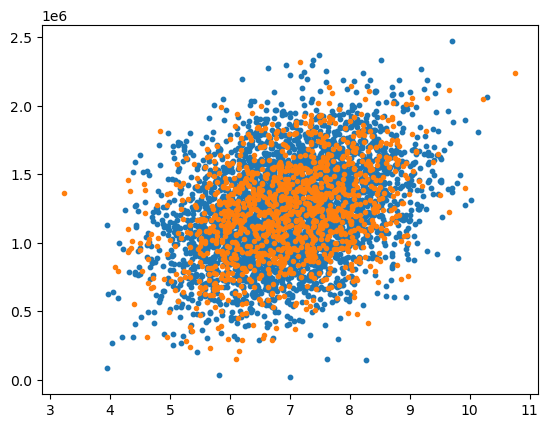

In [15]:
plt.figure()

plt.scatter(features_train, target_train, s=10)
plt.scatter(features_test, target_test, s=9)

plt.show()

#### Reshape the data
- scikit-learn's <font color='dodgerblue'>LinearRegression</font> requires the data to have a certain <font color='dodgerblue'>Numpy array shape</font>
- The `target_train` and `target_test` are both already in their correct shape


In [16]:
display(target_train)
display(target_train.shape)

array([1334537.42355949, 1310764.11188294,  736798.533309  , ...,
       1265180.90891648,  997618.67976942,  809089.6719455 ])

(3749,)

- However, since we only only one feature (i.e. one column $\rightarrow$ number of rooms), the feature containing arrays need to be reshpaed to contain nested lists:

In [17]:
display(features_train)
display(features_train.shape)

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362])

(3749,)

**Note:** If we do not reshape the data, then in the next step (i.e. `model = reg.fit(X=features_train, y=target_train)`) we would obtain the following error:

`ValueError: Expected 2D array, got 1D array instead:
array=[7.76350224 6.67325638 6.39398078 ... 6.11019169 7.04733826 5.35511362].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.`

Numpy's reshape function: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
- `One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.

In [18]:
features_train = np.reshape(features_train, (-1, 1))
features_train

array([[7.76350224],
       [6.67325638],
       [6.39398078],
       ...,
       [6.11019169],
       [7.04733826],
       [5.35511362]])

In [19]:
features_test = np.reshape(features_test, (-1, 1))
features_test

array([[6.57676266],
       [7.47055751],
       [7.09271404],
       ...,
       [7.33598472],
       [5.96123976],
       [7.05452948]])

### Least Squared Linear Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- `sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)`

We will train in two steps
1. Define our **model** to be a linear regression

In [20]:
reg = LinearRegression(fit_intercept=True)

2. Have the model **learn** from our data (i.e. optimize for a best fit)
     - This is the creation of a **model** that represents our training data

In [21]:
model = reg.fit(X=features_train, y=target_train)

<!-- To obtain the weights (a.k.a. coefficients) for each feature (i.e., currently only for rooms):
`print(f'Coefficients: {model.coef_}')` -->

### Making predictions using your model

- `predict`
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

- New house that has 5 rooms

- Need to have 

In [22]:
new_house_features = np.array([ [5] ]) # 5 rooms
display(new_house_features.shape)

model.predict(X=new_house_features)

(1, 1)

array([1001101.21587117])

In [23]:
new_house_features = np.array([ [5], [2] ]) # 5 rooms
display(new_house_features.shape)

model.predict(X=new_house_features)

(2, 1)

array([1001101.21587117,  648896.73256613])

#### Evaluate the fit using Coefficient of Determination ($R^2$) goodness-of-fit
- https://en.wikipedia.org/wiki/Coefficient_of_determination

Two ways to obtain this value:
1. `score`
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


2. `r2_score`
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

- Score = 1 : **Best possible model**
    
- Score = 0 : **Poor model** - a model that predicts the expected value of y regardless of the input feature values

- Score > 1 or < 0: **Wrong model** (or **wrong constraints applied**)

In [24]:
model.score(X=features_test, y=target_test)

0.1173486982720563

In [25]:
display(features_test.shape)

predict = model.predict(X=features_test)
predict

(1250, 1)

array([1186215.50861122, 1291148.35942672, 1246788.97167495, ...,
       1275349.31239641, 1113952.20006345, 1242306.04755028])

In [26]:
r2_score(y_true=target_test, y_pred=predict, multioutput='uniform_average')

0.1173486982720563

#### Overlay the scattered data with the linear regression prediction

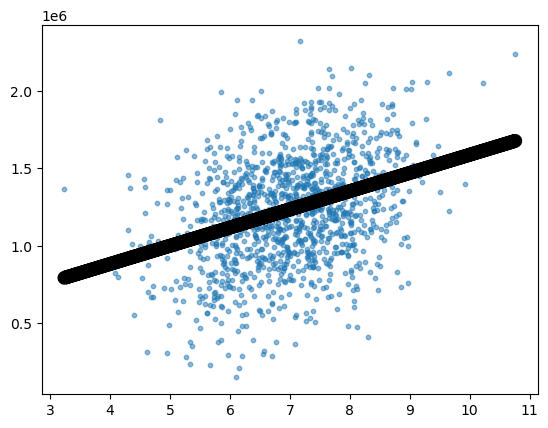

In [27]:
plt.figure()

plt.scatter(features_test, target_test, s=10, alpha=0.5)
plt.plot(features_test, predict, color='black', linewidth=10, linestyle='solid')

plt.show()

In [28]:
print(f'Coefficients: {model.coef_}')
print()
print(f'y-intercept: {model.intercept_}')

Coefficients: [117401.49443501]

y-intercept: 414093.7436961011


In [29]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [30]:
price = (model.coef_[0] * 6.7) + model.intercept_
f'{price:0.3e}'

'1.201e+06'

<hr style="border:1px solid gray"></hr>

## The next step:


The equation that defines a line that has two "feature" (i.e., two independent variable) is 

$y = m_1*x_1 + m_2*x_2 + b$

- $x_1$ and $x_2$ = data for the two features
- $m_1$ and $m_2$ = the coefficients
- $b$ = y-intercept


- How does one do this using multiple features (i.e., in multiple dimensional space)?
- Let's generate a model that uses 'income', 'age', 'rooms', 'bedrooms' and 'population' to make a prediction

In [31]:
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [32]:
target = housing['price'].values
display(target)

array([1505890.91484695, 1058987.98787608, 1260616.80662945, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [33]:
two_features = ['age', 'rooms']
display(housing[two_features].shape)
display(two_features)

(4999, 2)

['age', 'rooms']

**Notice**: since with are dealing with two columns, we can pass the Pandas DataFrame directly to `train_test_split` without reshaping them.

In [34]:
features_train, features_test, target_train, target_test = train_test_split(housing[two_features], target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

In [35]:
features_train

,age,rooms
3092,5.347527,7.763502
632,6.371179,6.673256
577,5.241163,6.393981
4133,5.739553,7.013864
2625,6.165033,7.085072
...,...,...
2895,7.181744,4.419215
2763,6.742828,6.604335
905,6.010154,6.110192
3980,4.069650,7.047338


In [36]:
reg = LinearRegression(fit_intercept=True)

In [37]:
model = reg.fit(X=features_train, y=target_train)

In [38]:
model.score(X=features_test, y=target_test)

0.3118247657615971

In [39]:
predict = model.predict(X=features_test)
predict

array([1353188.28612759, 1527233.54154822, 1563438.45256345, ...,
       1388865.46294633,  705620.78631846, 1231882.19625501])

In [40]:
def plot_features(feature_list: list,
                  target: np.ndarray,
                  feature_df: pd.DataFrame,
                  predict: np.ndarray=None):
    ''' Create a plot with multiple subplots displayed in two columns.
    
        Args
            feature_list: y-axis features to be extracted from feature_df (i.e. column names)
            target: x-axis data
            feature_df: y-axis data
            predict: predicted values based on machine learning
        Returns
            plot
        
        Library dependencis
            matplotlib
            numpy
            pandas
    '''

    if not isinstance(feature_list, list):
        raise TypeError('Input features are not given as a list.')
    elif not isinstance(target, np.ndarray):
        raise TypeError('Target values are not given as a NumPy array.')
    elif not isinstance(feature_df, pd.DataFrame):
        raise TypeError('feature_df is not given as a Pandas dataframe.')
    elif not isinstance(predict, np.ndarray):
        raise TypeError('predict is not given as a NumPy array.')
    else:  

        number_of_rows = int(np.ceil(len(feature_list)/2))  # number of rows for a 2 column plot

        fig = plt.figure(figsize=(11, 3*number_of_rows))    # same height subplots regardless of rows

        fig.subplots_adjust(wspace=0.2, hspace=0.5)

        for count, feature in enumerate(feature_list):    
            ax = fig.add_subplot(number_of_rows, 2, count+1)  # first position can not be zero

            ax.set_xlabel(xlabel=feature)
            ax.set_ylabel(ylabel='price')

            ax.scatter(feature_df[feature], target, color='dodgerblue', s=10, alpha=0.3)

            if predict is not None:
                plt.plot(feature_df[feature], predict, color='black', linewidth=5, alpha=0.3, linestyle='solid')

        plt.show()

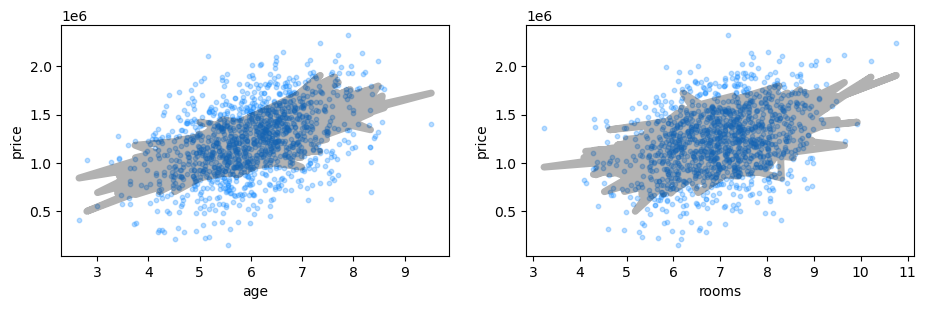

In [41]:
plot_features(feature_list=two_features, feature_df=features_test, target=target_test, predict=predict)

#### What would the resulting two-feature linear equation look like, for one of the input houses?

$y = (m_1*x_1) + (m_2*x_2) + (b)$

In [59]:
print(f'Coefficients: {model.coef_}')
print()
print(f'y-intercept: {model.intercept_}')

Coefficients: [2.15946803e+01 1.65775665e+05 1.19457933e+05 1.48197128e+03
 1.52266374e+01]

y-intercept: -2630328.550809551


In [60]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [61]:
print(f'y = ({model.coef_[0]:0.2e} * {float(housing["age"].loc[[0]]):0.2e}) \n'\
      f'  + ({model.coef_[1]:0.2e} * {float(housing["rooms"].loc[[0]]):0.2e}) \n'\
      f'  + {model.intercept_:0.2e}')

y = (2.16e+01 * 6.00e+00) 
  + (1.66e+05 * 6.73e+00) 
  + -2.63e+06


In [62]:
price = (model.coef_[0] * float(housing["age"].loc[[0]]))     \
      + (model.coef_[1] * float(housing["rooms"].loc[[0]]))        \
      + model.intercept_

f'{price:0.3e}'

'-1.514e+06'

<hr style="border:1px solid gray"></hr>

### Now Five Feature Learning

In [46]:
five_features = ['income', 'age', 'rooms', 'bedrooms', 'population']

display(housing[five_features].shape)

display(housing[five_features])

(4999, 5)

,income,age,rooms,bedrooms,population
0,79248.642455,6.002900,6.730821,3.09,40173.072174
1,61287.067179,5.865890,8.512727,5.13,36882.159400
2,63345.240046,7.188236,5.586729,3.26,34310.242831
3,59982.197226,5.040555,7.839388,4.23,26354.109472
4,80175.754159,4.988408,6.104512,4.04,26748.428425
...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035
4995,78491.275435,6.999135,6.576763,4.02,25616.115489
4996,63390.686886,7.250591,4.805081,2.13,33266.145490
4997,68001.331235,5.534388,7.130144,5.44,42625.620156


In [47]:
features_train, features_test, target_train, target_test = train_test_split(housing[five_features], target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

In [48]:
model = reg.fit(X=features_train, y=target_train)

In [49]:
model.score(X=features_test, y=target_test)

0.9187244501899446

In [50]:
predict = model.predict(X=features_test)
predict

array([1406603.00612469, 1614010.33868918, 1450190.49885834, ...,
       1208628.34023584,  476142.09777603,  909865.65577749])

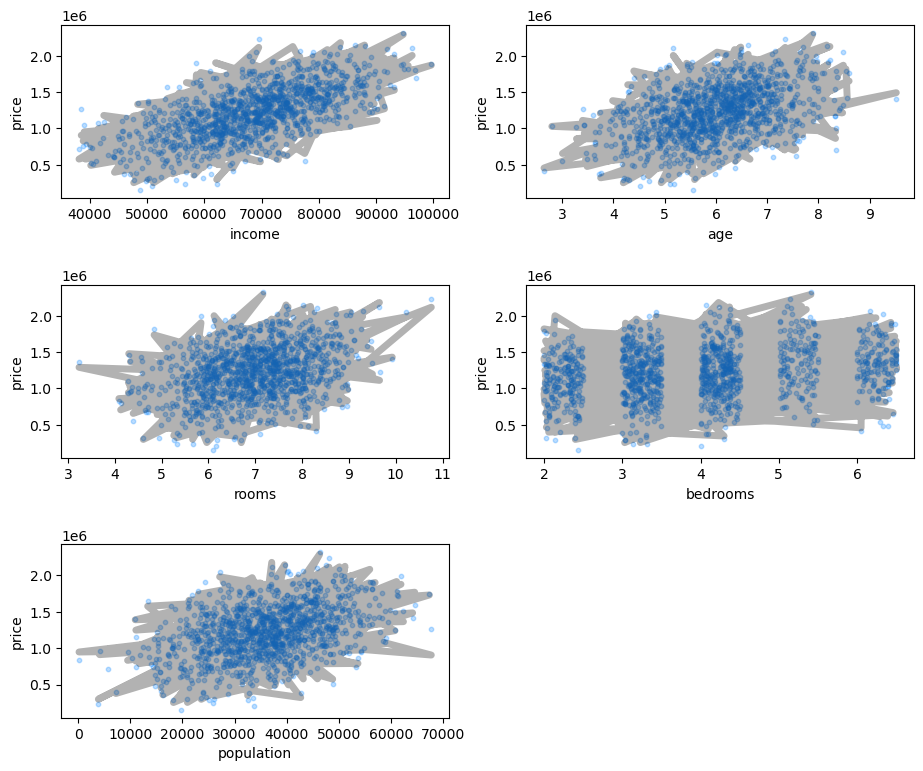

In [51]:
plot_features(feature_list=five_features, feature_df=features_test, target=target_test, predict=predict)

#### What would the resulting five-feature linear equation look like, for one of the input houses?

$y = (m_1*x_1) + (m_2*x_2) + (m_3*x_3) + (m_4*x_4) + (m_5*x_5) + (b)$

In [52]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [53]:
print(f'y = ({model.coef_[0]:0.2e} * {float(housing["income"].loc[[0]]):0.2e}) \n'\
      f'  + ({model.coef_[1]:0.2e} * {float(housing["age"].loc[[0]]):0.2e}) \n'\
      f'  + ({model.coef_[2]:0.2e} * {float(housing["rooms"].loc[[0]]):0.2e}) \n'\
      f'  + ({model.coef_[3]:0.2e} * {float(housing["bedrooms"].loc[[0]]):0.2e}) \n'\
      f'  + ({model.coef_[4]:0.2e} * {float(housing["population"].loc[[0]]):0.2e}) \n'\
      f'  + {model.intercept_:0.2e}')

y = (2.16e+01 * 7.92e+04) 
  + (1.66e+05 * 6.00e+00) 
  + (1.19e+05 * 6.73e+00) 
  + (1.48e+03 * 3.09e+00) 
  + (1.52e+01 * 4.02e+04) 
  + -2.63e+06


In [54]:
price = (model.coef_[0] * float(housing["income"].loc[[0]]))     \
      + (model.coef_[1] * float(housing["age"].loc[[0]]))        \
      + (model.coef_[2] * float(housing["rooms"].loc[[0]]))      \
      + (model.coef_[3] * float(housing["bedrooms"].loc[[0]]))   \
      + (model.coef_[4] * float(housing["population"].loc[[0]])) \
      + model.intercept_

f'{price:0.3e}'

'1.496e+06'

#### How do you run the model for a new house?

1. Create a new dataframe that provides the house's features
2. Use `predict` to generate a predicted value

In [55]:
new_house_features = pd.DataFrame(np.array([ [8.00e4, 6.5, 7.0, 4.0, 40.0e3 ] ]),
                                  columns=five_features)

display(new_house_features)

,income,age,rooms,bedrooms,population
0,80000.0,6.5,7.0,4.0,40000.0


In [56]:
new_house_price = model.predict(X=new_house_features)
new_house_price

array([1625986.60825997])

In [57]:
display(new_house_features)
print(f'Cost of the above house is predicted to be: ${float(new_house_price):0.3e}.')

,income,age,rooms,bedrooms,population
0,80000.0,6.5,7.0,4.0,40000.0


Cost of the above house is predicted to be: $1.626e+06.
